In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Data Analysis\Video Game Sales Analysis\vgsales.csv")

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [16]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
max_sales_per_name = df.groupby('Name')['Global_Sales'].max()
top_10_max_sales = max_sales_per_name.nlargest(10)
top_10_max_sales

Name
Wii Sports                   82.74
Super Mario Bros.            40.24
Mario Kart Wii               35.82
Wii Sports Resort            33.00
Pokemon Red/Pokemon Blue     31.37
Tetris                       30.26
New Super Mario Bros.        30.01
Wii Play                     29.02
New Super Mario Bros. Wii    28.62
Duck Hunt                    28.31
Name: Global_Sales, dtype: float64

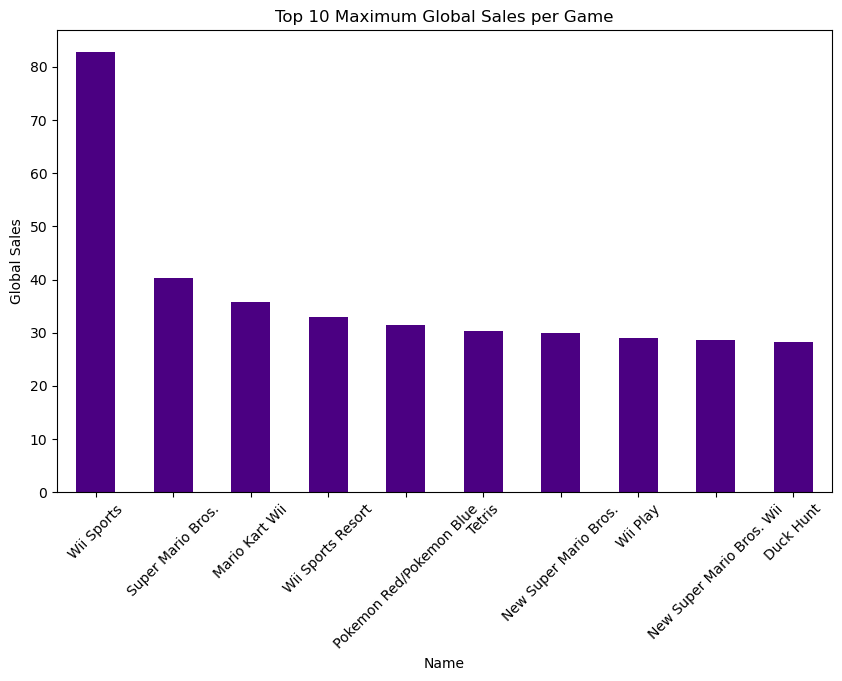

In [8]:
plt.figure(figsize=(10, 6))
top_10_max_sales.plot(kind='bar', color='indigo')
plt.title('Top 10 Maximum Global Sales per Game')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

In [9]:
df['Year'].value_counts()
#2009 Sold the most games.

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64

In [10]:
#Lets breakdown by genre
df['Genre'].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

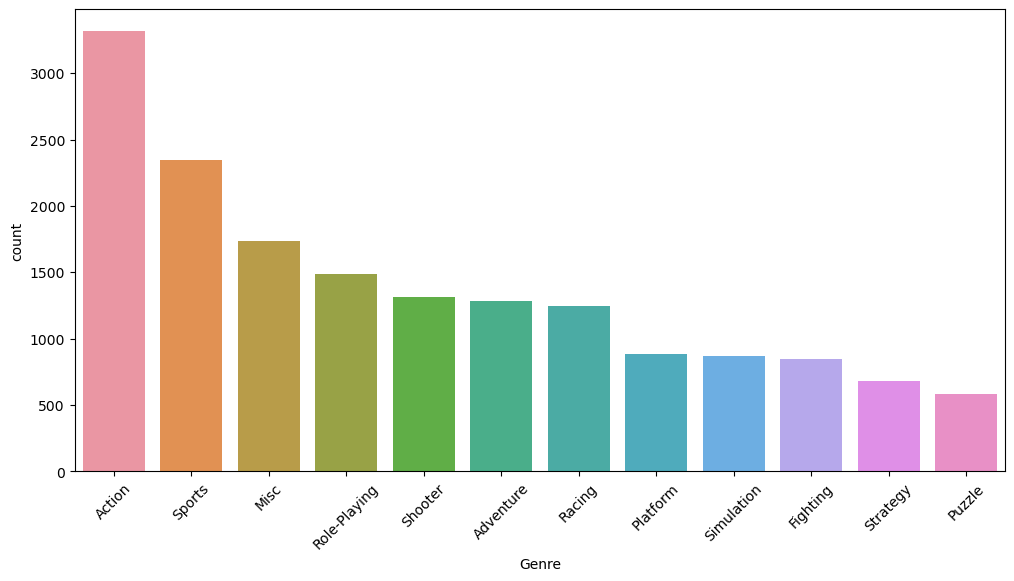

In [32]:
plt.figure(figsize=(12,6))
genre_counts = df['Genre'].value_counts()
sns.countplot(df,x='Genre', order=genre_counts.index)
plt.xticks(rotation=45)
plt.show()

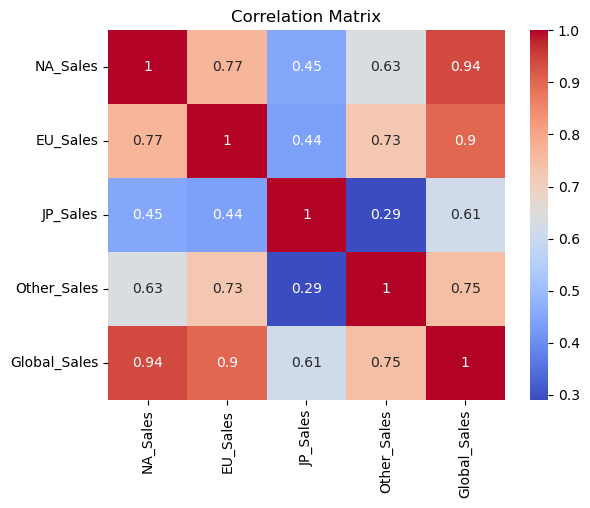

In [35]:
correlation_matrix = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [36]:
#The relative contribution of each country to the global sales:

In [56]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [67]:
Countries = df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]

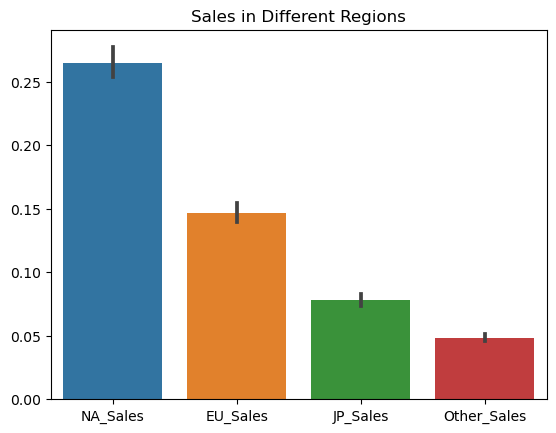

In [78]:
sns.barplot(Countries)
plt.title('Sales in Different Regions')

plt.show()

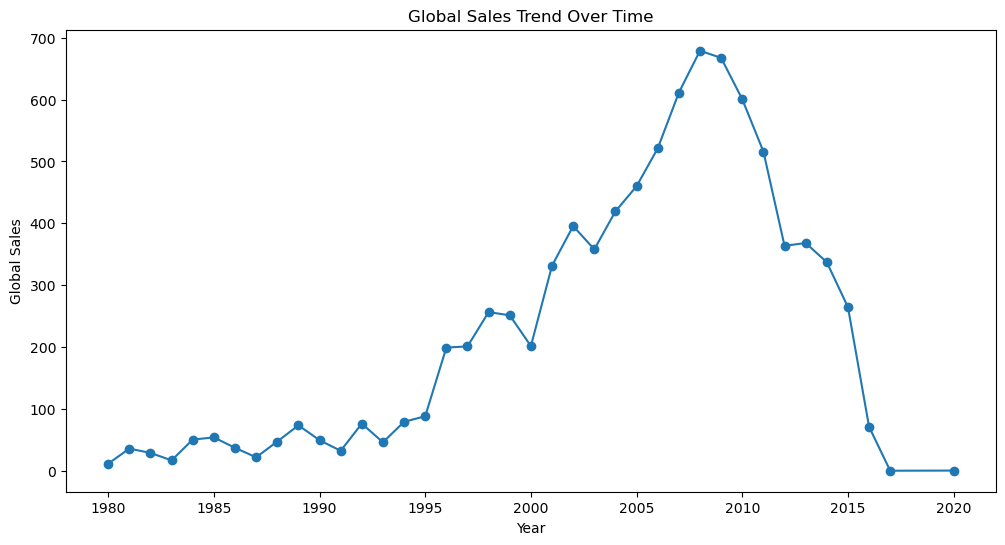

In [18]:
df.groupby('Year')['Global_Sales'].sum().plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Global Sales Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales')

plt.show()

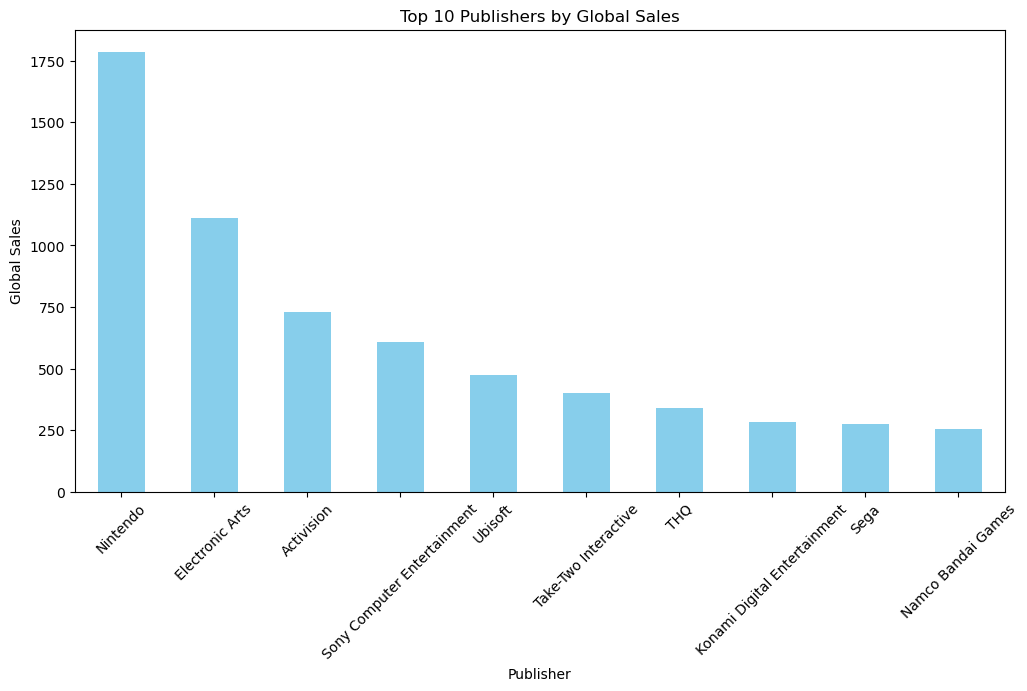

In [14]:
# Top publishers for total sales:

top_publishers = df.groupby('Publisher')['Global_Sales'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_publishers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)

plt.show()